# p1. Regression


- 기수: 11기

- 이름: 송예원

- 작성자: 9기 이승원


_해당 실습 자료는 23-2 응용통계학과 김현중 교수님의 [데이터마이닝]의 수업자료와 해당 수업에서 본 출제자가 진행한 프로젝트를 기반으로 만들었음을 밝힙니다._


### 01. Setting


In [1]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
path_data = '/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습'

In [6]:
df = pd.read_excel(path_data + "/data/bicycle_data.xlsx")
df.head()

행정동   이용건수     행정동코드  자치구  대여소개수       이용거리(M)  이용시간(분)  LCD_거치_대수  \
0  청운효자동  11755  11110515  종로구      3  2.904426e+07   284027          5   
1    사직동  58976  11110530  종로구     12  1.243033e+08  1195279         99   
2    삼청동  15960  11110540  종로구      5  3.520926e+07   368791         23   
3    부암동   4353  11110550  종로구      5  1.896218e+07   126968         23   
4    평창동   3810  11110560  종로구      5  1.410898e+07    94067         15   

   QR_거치_대수  상권_수  ...     여자20s생활인구     여자30s생활인구     여자40s생활인구  \
0        59     5  ...  2.885425e+06  3.143521e+06  3.745018e+06   
1       139     6  ...  5.133218e+06  6.282004e+06  5.561868e+06   
2        38     1  ...  1.157874e+06  1.197700e+06  1.266266e+06   
3        26     5  ...  2.305686e+06  1.908983e+06  2.804853e+06   
4        23     3  ...  1.935554e+06  2.306512e+06  3.250538e+06   

      여자50s생활인구     여자60s생활인구   여자70s이상생활인구  아파트_단지_수  아파트_평균_시가  길단위유동인구  \
0  3.170072e+06  2.157854e+06  2.640629e+06       323  276146690    14261   
1  4.041477e+06  2.650009e+06  2.740232e+06        89  371237211    34035   
2  9.427540e+05  7.849797e+05  7.954017e+05         9  401044841     6745   
3  2.466070e+06  1.871393e+06  2.216136e+06       189  259634651     5001   
4  3.803050e+06  3.117086e+06  3.559939e+06       294  480839259      878   

   직장인구  
0    41  
1   413  
2    40  
3    18  
4    26  

[5 rows x 76 columns]

In [7]:
df.shape

(424, 76)

### 02. Linear Regression


#### 02-1. Data Preprocessing


우선, 분석에 필요하지 않은 열을 제거한다. (독립변수의 임의 제거가 아닌, 애초에 분석에 불필요한 정보를 제거한다.)


In [8]:
df1 = df.drop(['행정동', '행정동코드', '자치구', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수'], axis=1)

# Check dropped columns
df1.columns

Index(['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구'],
      dtype='object')

앞서 살펴보았듯, 각 변수들의 범위는 상당히 다르다.

회귀분석은 데이터의 단위 (범위)에 민감하기 때문에 Scaling이 필요하다.

<hr/>


In [9]:
df1.head()

이용건수  상권_수  집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수  약국_수  유치원_수  ...  \
0  11755     5      24      3     1      0       0        0     1      0  ...   
1  58976     6     200     12    22      0       0        0    20      0  ...   
2  15960     1      16      3     1      0       0        0     0      0  ...   
3   4353     5      46      3     2      0       0        0     2      0  ...   
4   3810     3      86      4     1      0       0        0     2      1  ...   

      여자20s생활인구     여자30s생활인구     여자40s생활인구     여자50s생활인구     여자60s생활인구  \
0  2.885425e+06  3.143521e+06  3.745018e+06  3.170072e+06  2.157854e+06   
1  5.133218e+06  6.282004e+06  5.561868e+06  4.041477e+06  2.650009e+06   
2  1.157874e+06  1.197700e+06  1.266266e+06  9.427540e+05  7.849797e+05   
3  2.305686e+06  1.908983e+06  2.804853e+06  2.466070e+06  1.871393e+06   
4  1.935554e+06  2.306512e+06  3.250538e+06  3.803050e+06  3.117086e+06   

    여자70s이상생활인구  아파트_단지_수  아파트_평균_시가  길단위유동인구  직장인구  
0  2.640629e+06       323  276146690    14261    41  
1  2.740232e+06        89  371237211    34035   413  
2  7.954017e+05         9  401044841     6745    40  
3  2.216136e+06       189  259634651     5001    18  
4  3.559939e+06       294  480839259      878    26  

[5 rows x 68 columns]

- **Point 1. Robust Scaler를 사용하는 이유는 해당 Method가 중앙값과 삽누위수 범위를 사용하므로 Outlier에 덜 민감하기 때문이다. 따라서 별도의 Outlier 처리를 포함하진 않는다.**

- **Point 2. OLS를 돌릴 때, 컬럼명이 숫자로 시작하면 오류가 뜬다. (출제자가 실제 회귀분석과제를 할 때 에러가 떠서 고생을 했던 기억이 있어 꼭 기억하면 좋겠다.)**


In [10]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(df1)

# 훈련 데이터 스케일링
all_scaled = robust_scaler.transform(df1)
df2_scaled = pd.DataFrame(all_scaled, columns = df1.columns)

# OLS에 알맞게 컬럼명 변경 (원래 숫자로 되어 있던 컬럼명에 언더바를 추가해줌)
df2_scaled.columns = ['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구']

In [11]:
df2_scaled.head()

이용건수      상권_수    집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수  \
0 -0.370264  0.333333 -0.422145    0.5  0.00    0.0     0.0      0.0   
1  1.192504  0.666667  2.013841    5.0  5.25    0.0     0.0      0.0   
2 -0.231101 -1.000000 -0.532872    0.5  0.00    0.0     0.0      0.0   
3 -0.615232  0.333333 -0.117647    0.5  0.25    0.0     0.0      0.0   
4 -0.633202 -0.333333  0.435986    1.0  0.00    0.0     0.0      0.0   

       약국_수  유치원_수  ...  여자20s생활인구  여자30s생활인구  여자40s생활인구  여자50s생활인구  \
0 -0.555556    0.0  ...  -0.186164  -0.188702   0.023044  -0.156918   
1  1.555556    0.0  ...   0.476562   0.844300   0.655541   0.240888   
2 -0.666667    0.0  ...  -0.695505  -0.829151  -0.839882  -1.173713   
3 -0.444444    0.0  ...  -0.357091  -0.595038  -0.304255  -0.478303   
4 -0.444444    1.0  ...  -0.466219  -0.464196  -0.149099   0.132043   

   여자60s생활인구  여자70s이상생활인구  아파트_단지_수  아파트_평균_시가   길단위유동인구      직장인구  
0  -0.370213    -0.254954  0.444662   0.046755 -0.752024  0.000000  
1  -0.086386    -0.200455 -0.472086   0.450052 -0.385100  5.975904  
2  -1.161956    -1.264595 -0.785504   0.576471 -0.891490 -0.016064  
3  -0.535416    -0.487221 -0.080313  -0.023275 -0.923851 -0.369478  
4   0.182979     0.248059  0.331048   0.914894 -1.000357 -0.240964  

[5 rows x 68 columns]

#### 02-2. Feature Selection


독립변수와 종속변수에 해당하는 변수들을 각각 할당한다.


In [12]:
X = df2_scaled.drop('이용건수', axis=1)
y = df2_scaled['이용건수']

파이썬에서는 자체적으로 feature selection module을 제공하지 않는다.

본 과제에서는 함께 제공한 _./src/feature_selection.py_ 를 사용하여 진행하도록 하겠다.


사용시 주의할 점은 다음과 같다.

- 1. 현재 분석이 Linear Regression이니 'linear' 선택
- 2. AIC를 기준으로 Feature를 선택할 것이기에 'aic' 선택


In [21]:
import sys
sys.path.append('/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/')

In [22]:
import utils.feature_selection as fsel
#imoprt feature_selection import fsel -> if feature_selection.py at same directory

fsel.forwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 남자40s생활인구 	AIC : 1280.964912822545


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : _30s_korean 	AIC : 1270.9460933043408


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 아파트_단지_수 	AIC : 1244.1841297555256


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 길단위유동인구 	AIC : 1239.2670646825086
Entered : 초등학교_수 	AIC : 1234.87268860349


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 직장인구 	AIC : 1230.9220038536073
Entered : 지하철_하차 	AIC : 1228.155526320979


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.75e-40
Time:                        10:01:24   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.1797 

['intercept',
 '남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

앞선 Feature Selection을 통해 선택된 변수들을 대사응로, 다중공선성을 만족하는지 확인한다.

다중공선성을 만족하는 변수들의 조합으로 선형 회귀 분석을 진행한다.

- 다중공선성 판별 기준: VIF값 10 이하


In [23]:
# feature selection을 통해 선택된 변수들을 리스트 형태로 입력!
selected_cols = ['남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 데이터프레임 초기화
vif_data = df2_scaled[selected_cols].copy()  # X를 복사하여 사용합니다.

# VIF 계산
vif_data['Intercept'] = 1  # 상수항을 위한 Intercept 추가
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col', 'vif']
vif_df

# VIF 출력
print(vif_series)

# VIF 10 이상 삭제
selected_cols = []
for i in range(len(vif_df)):
    if vif_df['vif'][i] < 10:
        selected_cols.append(vif_df['col'][i])

selected_cols.remove('Intercept')
selected_cols

남자40s생활인구      2.612474
_30s_korean    1.970809
아파트_단지_수       1.338337
길단위유동인구        1.042099
초등학교_수         1.042781
직장인구           1.444073
지하철_하차         1.753606
Intercept      1.327840
dtype: float64


['남자40s생활인구', '_30s_korean', '아파트_단지_수', '길단위유동인구', '초등학교_수', '직장인구', '지하철_하차']

In [25]:
import statsmodels.formula.api as smf

model = smf.ols(formula = "이용건수~ " + "+".join(selected_cols).replace(" ", "_"),
                 data=df2_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.75e-40
Time:                        10:01:48   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1797      0.057      3.148      0.002       0.067       0.292
남자40s생활인구       0.4433      0.071      6.228      0.000       0.303       0.583
_30s_korean     0.4910      0.090      5.451      0.000       0.314       0.668
아파트_단지_수       -0.3688      0.072     -5.098      0.000      -0.511      -0.227
길단위유동인구        -0.1829      0.067     -2.712      0.007      -0.316      -0.050
초등학교_수          0.7257      0.273      2.662      0.008       0.190       1.262
직장인구           -0.0668      0.024     -2.775      0.006      -0.114      -0.019
지하철_하차          0.1150      0.053      2.169      0.031       0.011       0.219
==============================================================================
Omnibus:                      386.066   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20893.959
Skew:                           3.582   Prob(JB):                         0.00
Kurtosis:                      36.636   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 02-3. Evaluation


In [26]:
# sklearn 패키지의 model_selection 모듈에서 train_test_split 함수를 사용

from sklearn.model_selection import train_test_split

train, test = train_test_split(df2_scaled, test_size=0.3, random_state=1)
print('train:', len(train), '| test:', len(test))

train: 296 | test: 128


In [27]:
X_train = train.drop(['이용건수'], axis=1)
y_train = train['이용건수']
X_test = test.drop(['이용건수'], axis=1)
y_test = test['이용건수']

In [28]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

pred = result.predict(X_test)

In [29]:
print(f'r2: {r2(y_test, pred)}')
print(f'mse: {mse(y_test, pred)}')
print(f'mae: {mae(y_test, pred)}')
print(f'mape: {mape(y_test, pred)}')

r2: 0.4645130532216033
mse: 1.5950294642500684
mae: 0.689016731517567
mape: 2.2034124083054976


#### 02-4. Regression


In [30]:
import statsmodels.api as sm

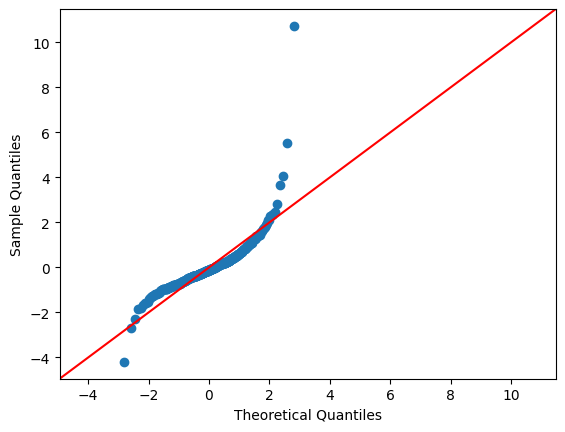

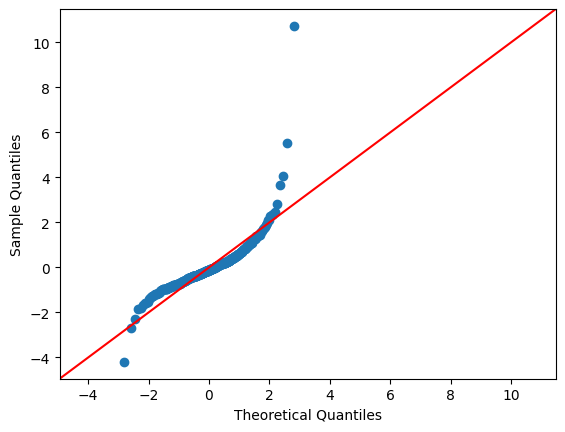

In [31]:
import seaborn as sns
import matplotlib as plt

sm.qqplot(result.resid, fit=True, line='45')

<Axes: xlabel='fitted', ylabel='resid'>

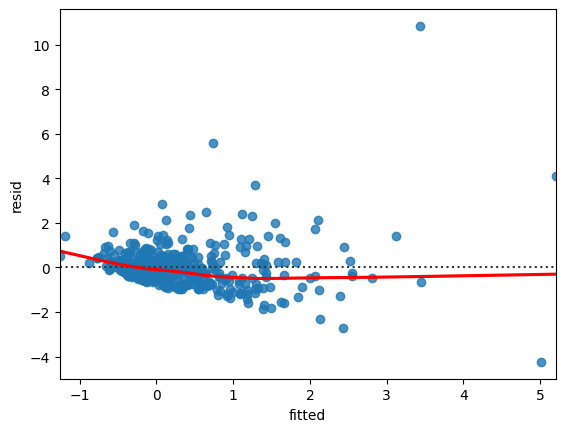

In [32]:
eqvar = pd.DataFrame({'fitted': result.fittedvalues, 'resid' : result.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)

#### 02-5. TODO


**다양한 Scaling 방법과 Forward/Backward Selection 및 각종 Feature Selection 방법을 이용해 Linear Regression을 실습해보세요.**


#### TODO.1: Standard Scaler + Backward Selection

In [47]:
### Standard Scaler
from sklearn.preprocessing import StandardScaler

# 변형 객체 생성
standard_scaler = StandardScaler()

# 훈련데이터의 모수 분포 저장
standard_scaler.fit(df1)

# 훈련 데이터 스케일링
all_scaled = standard_scaler.transform(df1)
df3_scaled = pd.DataFrame(all_scaled, columns = df1.columns)

# OLS에 알맞게 컬럼명 변경 (원래 숫자로 되어 있던 컬럼명에 언더바를 추가해줌)
df3_scaled.columns = ['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구']

In [34]:
### Feature Selection: 후진선택
X = df3_scaled.drop('이용건수', axis=1)
y = df3_scaled['이용건수']

fsel.backwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : intercept
Eliminated : 중학교_수
Regained :  중학교_수
                                 OLS Regression Results                                
Dep. Variable:                   이용건수   R-squared (uncentered):                   0.530
Model:                            OLS   Adj. R-squared (uncentered):              0.449
Method:                 Least Squares   F-statistic:                              6.474
Date:                Sun, 04 Aug 2024   Prob (F-statistic):                    1.43e-31
Time:                        10:09:03   Log-Likelihood:                         -441.35
No. Observations:                 424   AIC:                                      1009.
Df Residuals:                     361   BIC:                                      1264.
Df Model:                          63                                                  
Covariance Type:            nonrobust                                            

['상권_수',
 '집객시설_수',
 '관공서_수',
 '은행_수',
 '총병원_수',
 '종합병원_수',
 '일반_병원_수',
 '약국_수',
 '유치원_수',
 '초중고등학교_수',
 '초등학교_수',
 '중학교_수',
 '고등학교_수',
 '대학교_수',
 '백화점_수',
 '슈퍼마켓_수',
 '극장_수',
 '숙박_시설_수',
 '_0s_foreigner',
 '_10s_foreigner',
 '_20s_foreigner',
 '_30s_foreigner',
 '_40s_foreigner',
 '_50s_foreigner',
 '_60s_foreigner',
 '_70s_foreigner',
 '_80s_foreigner',
 '_90s_foreigner',
 '_100s_foreigner',
 '_0s_korean',
 '_10s_korean',
 '_20s_korean',
 '_30s_korean',
 '_40s_korean',
 '_50s_korean',
 '_60s_korean',
 '_70s_korean',
 '_80s_korean',
 '_90s_korean',
 '_100s_korean',
 '총생활인구수',
 '대중교통_승차',
 '지하철_승차',
 '버스_승차',
 '대중교통_하차',
 '지하철_하차',
 '버스_하차',
 '남자0s생활인구',
 '남자10s생활인구',
 '남자20s생활인구',
 '남자30s생활인구',
 '남자40s생활인구',
 '남자50s생활인구',
 '남자60s생활인구',
 '남자70s이상생활인구',
 '여자0s생활인구',
 '여자10s생활인구',
 '여자20s생활인구',
 '여자30s생활인구',
 '여자40s생활인구',
 '여자50s생활인구',
 '여자60s생활인구',
 '여자70s이상생활인구',
 '아파트_단지_수',
 '아파트_평균_시가',
 '길단위유동인구',
 '직장인구']

In [35]:
# feature selection을 통해 선택된 변수들을 리스트 형태로 입력!
selected_cols = ['상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner', '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner', '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner', '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean', '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean', '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차', '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구', '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구', '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구', '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가', '길단위유동인구', '직장인구']


In [36]:
# VIF 데이터프레임 초기화
vif_data = df3_scaled[selected_cols].copy()  # X를 복사하여 사용합니다.

# VIF 계산
vif_data['Intercept'] = 1  # 상수항을 위한 Intercept 추가
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col', 'vif']
vif_df

# VIF 출력
print(vif_series)

# VIF 10 이상 삭제
selected_cols = []
for i in range(len(vif_df)):
    if vif_df['vif'][i] < 10:
        selected_cols.append(vif_df['col'][i])

selected_cols.remove('Intercept')
selected_cols

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


상권_수         3.594545e+00
집객시설_수       3.532293e+01
관공서_수        3.940842e+00
은행_수         1.193770e+01
총병원_수        9.007199e+15
                 ...     
아파트_단지_수     3.172911e+00
아파트_평균_시가    2.441306e+00
길단위유동인구      1.704278e+00
직장인구         2.104933e+00
Intercept    1.000000e+00
Length: 68, dtype: float64


['상권_수',
 '관공서_수',
 '유치원_수',
 '대학교_수',
 '백화점_수',
 '슈퍼마켓_수',
 '극장_수',
 '숙박_시설_수',
 '_80s_foreigner',
 '_90s_foreigner',
 '_100s_foreigner',
 '_90s_korean',
 '_100s_korean',
 '아파트_단지_수',
 '아파트_평균_시가',
 '길단위유동인구',
 '직장인구']

- 선택된 변수가 훨씬 많음..

In [43]:
model = smf.ols(formula = "이용건수~ " + "+".join(selected_cols).replace(" ", "_"),
                 data=df3_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     4.943
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           9.55e-10
Time:                        10:17:18   Log-Likelihood:                -561.75
No. Observations:                 424   AIC:                             1159.
Df Residuals:                     406   BIC:                             1232.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.082e-17      0.045  -4.61e-16      1.000      -0.089       0.089
상권_수                0.1075      0.063      1.695      0.091      -0.017       0.232
관공서_수               0.1068      0.065      1.646      0.101      -0.021       0.234
유치원_수              -0.0671      0.050     -1.344      0.180      -0.165       0.031
대학교_수              -0.0422      0.047     -0.892      0.373      -0.135       0.051
백화점_수              -0.1438      0.052     -2.740      0.006      -0.247      -0.041
슈퍼마켓_수             -0.0977      0.050     -1.964      0.050      -0.195    7.18e-05
극장_수                0.2255      0.062      3.618      0.000       0.103       0.348
숙박_시설_수             0.0673      0.058      1.167      0.244      -0.046       0.181
_80s_foreigner     -0.0475      0.058     -0.821      0.412      -0.161       0.066
_90s_foreigner      0.0323      0.054      0.599      0.549      -0.074       0.138
_100s_foreigner     0.0170      0.049      0.350      0.727      -0.079       0.113
_90s_korean         0.2229      0.063      3.566      0.000       0.100       0.346
_100s_korean       -0.0064      0.059     -0.109      0.913      -0.122       0.109
아파트_단지_수           -0.0472      0.056     -0.836      0.403      -0.158       0.064
아파트_평균_시가           0.0936      0.056      1.686      0.093      -0.016       0.203
길단위유동인구            -0.0675      0.050     -1.358      0.175      -0.165       0.030
직장인구                0.0018      0.054      0.034      0.973      -0.104       0.108
==============================================================================
Omnibus:                      466.305   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36629.358
Skew:                           4.784   Prob(JB):                         0.00
Kurtosis:                      47.518   Cond. No.                         3.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
### Evaluation
train, test = train_test_split(df3_scaled, test_size=0.3, random_state=1)
print('train:', len(train), '| test:', len(test))

X_train = train.drop(['이용건수'], axis=1)
y_train = train['이용건수']
X_test = test.drop(['이용건수'], axis=1)
y_test = test['이용건수']

pred = result.predict(X_test)

print(f'r2: {r2(y_test, pred)}')
print(f'mse: {mse(y_test, pred)}')
print(f'mae: {mae(y_test, pred)}')
print(f'mape: {mape(y_test, pred)}')

train: 296 | test: 128
r2: 0.13789833875413116
mse: 1.5447497595938016
mae: 0.6341620890626796
mape: 5.466975592170953


- r2 value 너무 낮음

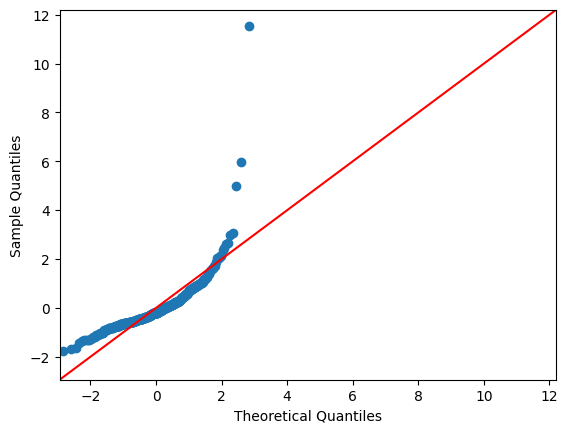

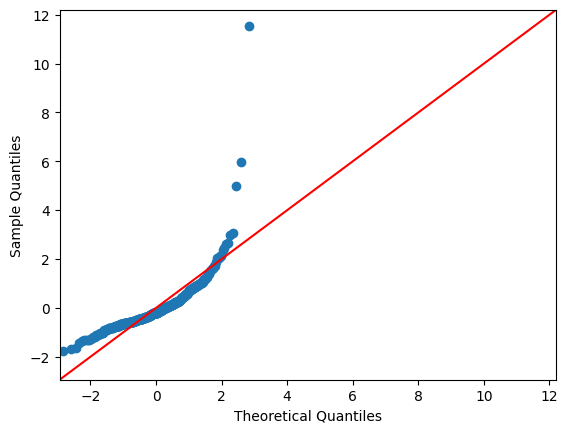

In [45]:
### Regression
sm.qqplot(result.resid, fit=True, line='45')

<Axes: xlabel='fitted', ylabel='resid'>

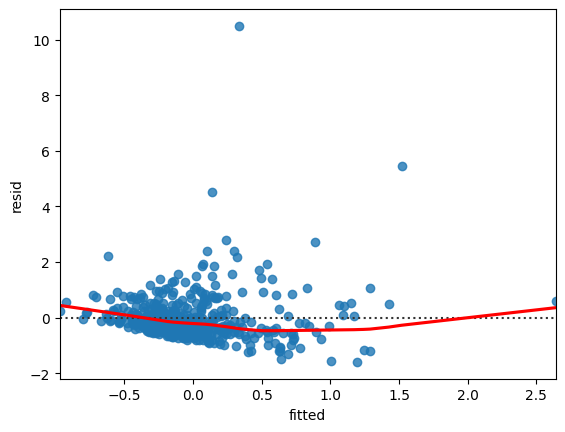

In [46]:
eqvar = pd.DataFrame({'fitted': result.fittedvalues, 'resid' : result.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)

#### TODO.2: PowerTransformer + Forward Selection

In [50]:
### Standard Scaler
from sklearn.preprocessing import PowerTransformer

# 변형 객체 생성
standard_scaler = PowerTransformer()

# 훈련데이터의 모수 분포 저장
standard_scaler.fit(df1)

# 훈련 데이터 스케일링
all_scaled = standard_scaler.transform(df1)
df4_scaled = pd.DataFrame(all_scaled, columns = df1.columns)

# OLS에 알맞게 컬럼명 변경 (원래 숫자로 되어 있던 컬럼명에 언더바를 추가해줌)
df4_scaled.columns = ['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구']

In [51]:
### Feature Selection: 후진선택
X = df4_scaled.drop('이용건수', axis=1)
y = df4_scaled['이용건수']

fsel.forwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 총생활인구수 	AIC : 1050.2393083348404


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 아파트_단지_수 	AIC : 1026.0663601448434


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : _30s_korean 	AIC : 1012.5279292136581


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 여자70s이상생활인구 	AIC : 1007.747555959737


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 남자60s생활인구 	AIC : 1001.846592683679


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 길단위유동인구 	AIC : 998.323995807383


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 직장인구 	AIC : 995.1842876032638
Entered : 아파트_평균_시가 	AIC : 990.4526754768204


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)
/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 남자30s생활인구 	AIC : 987.1600618259869


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 여자20s생활인구 	AIC : 984.7483865559949


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : 여자40s생활인구 	AIC : 978.6979612818737


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Entered : _20s_foreigner 	AIC : 972.9648194713367


/content/drive/MyDrive/DSL/과제 24-2/Regression+SVM+비지도학습/utils/feature_selection.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pvals = pd.concat([pvals, pd.DataFrame([[j, model.pvalues[j]]], columns=["Cols", "Pval"])], ignore_index=True)


Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     28.44
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           7.33e-47
Time:                        10:21:36   Log-Likelihood:                -473.48
No. Observations:                 424   AIC:                             973.0
Df Residuals:                     411   BIC:                             1026.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       4

['intercept',
 '총생활인구수',
 '아파트_단지_수',
 '_30s_korean',
 '여자70s이상생활인구',
 '남자60s생활인구',
 '길단위유동인구',
 '직장인구',
 '아파트_평균_시가',
 '남자30s생활인구',
 '여자20s생활인구',
 '여자40s생활인구',
 '_20s_foreigner']

In [52]:
# feature selection을 통해 선택된 변수들을 리스트 형태로 입력!
selected_cols = ['총생활인구수',
 '아파트_단지_수',
 '_30s_korean',
 '여자70s이상생활인구',
 '남자60s생활인구',
 '길단위유동인구',
 '직장인구',
 '아파트_평균_시가',
 '남자30s생활인구',
 '여자20s생활인구',
 '여자40s생활인구',
 '_20s_foreigner']

- 오오 새로운 변수들이다

In [53]:
# VIF 데이터프레임 초기화
vif_data = df4_scaled[selected_cols].copy()  # X를 복사하여 사용합니다.

# VIF 계산
vif_data['Intercept'] = 1  # 상수항을 위한 Intercept 추가
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col', 'vif']
vif_df

# VIF 출력
print(vif_series)

# VIF 10 이상 삭제
selected_cols = []
for i in range(len(vif_df)):
    if vif_df['vif'][i] < 10:
        selected_cols.append(vif_df['col'][i])

selected_cols.remove('Intercept')
selected_cols

총생활인구수            91.393593
아파트_단지_수           2.623314
_30s_korean        3.249214
여자70s이상생활인구        8.686417
남자60s생활인구         14.853317
길단위유동인구            1.720311
직장인구               2.038090
아파트_평균_시가          3.286113
남자30s생활인구         13.987087
여자20s생활인구         24.838853
여자40s생활인구         32.818130
_20s_foreigner     3.852909
Intercept          1.000000
dtype: float64


['아파트_단지_수',
 '_30s_korean',
 '여자70s이상생활인구',
 '길단위유동인구',
 '직장인구',
 '아파트_평균_시가',
 '_20s_foreigner']

In [54]:
model = smf.ols(formula = "이용건수~ " + "+".join(selected_cols).replace(" ", "_"),
                 data=df4_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     34.15
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.52e-37
Time:                        10:22:45   Log-Likelihood:                -505.37
No. Observations:                 424   AIC:                             1027.
Df Residuals:                     416   BIC:                             1059.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.377e-12      0.039   6.08e-11      1.000      -0.077       0.077
아파트_단지_수          -0.3572      0.059     -6.092      0.000      -0.472      -0.242
_30s_korean        0.4384      0.057      7.642      0.000       0.326       0.551
여자70s이상생활인구        0.2355      0.052      4.489      0.000       0.132       0.339
길단위유동인구           -0.2453      0.048     -5.156      0.000      -0.339      -0.152
직장인구               0.3090      0.046      6.747      0.000       0.219       0.399
아파트_평균_시가         -0.1124      0.059     -1.900      0.058      -0.229       0.004
_20s_foreigner     0.1123      0.047      2.390      0.017       0.020       0.205
==============================================================================
Omnibus:                       24.875   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.265
Skew:                          -0.294   Prob(JB):                     9.99e-13
Kurtosis:                       4.668   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
### Evaluation
train, test = train_test_split(df4_scaled, test_size=0.3, random_state=1)
print('train:', len(train), '| test:', len(test))

X_train = train.drop(['이용건수'], axis=1)
y_train = train['이용건수']
X_test = test.drop(['이용건수'], axis=1)
y_test = test['이용건수']

pred = result.predict(X_test)

print(f'r2: {r2(y_test, pred)}')
print(f'mse: {mse(y_test, pred)}')
print(f'mae: {mae(y_test, pred)}')
print(f'mape: {mape(y_test, pred)}')

train: 296 | test: 128
r2: 0.3885122744146441
mse: 0.6982183501252301
mae: 0.6330635310553046
mape: 1.6834391957198633


- 이 결과가 제일 나은듯

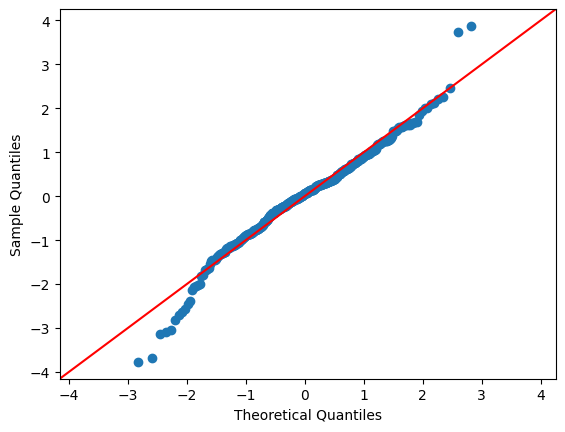

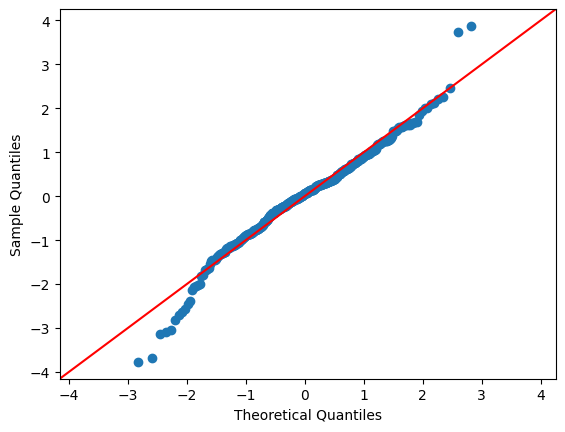

In [57]:
### Regression
sm.qqplot(result.resid, fit=True, line='45')

- 데이터 분포를 정규 분포로 변환하는 Box-Cox 변환을 사용했다 보니 정규성을 전보다는 잘 따른다.

<Axes: xlabel='fitted', ylabel='resid'>

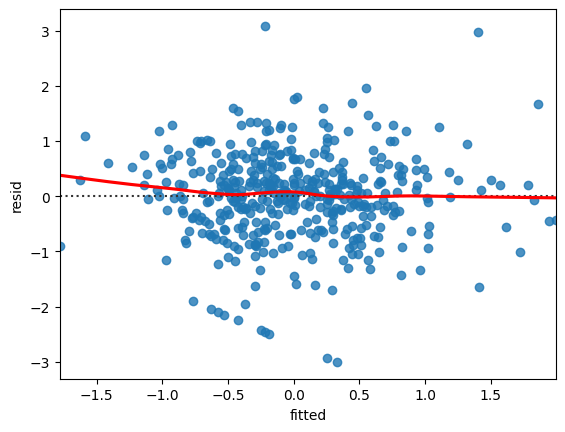

In [58]:
eqvar = pd.DataFrame({'fitted': result.fittedvalues, 'resid' : result.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)

- 다이아몬드 모양을 띈다.. 수상하다....

### 03. Logistic Regression


In [62]:
import pandas as pd
df = pd.read_excel(path_data + '/data/bicycle_data.xlsx')

In [63]:
# Label it based on 0.5.
y_median = df['이용건수'].quantile(0.5)
df['y'] = df['이용건수'].apply(lambda x: 1 if x >= y_median else 0)

# 열 순서 재배치
df = df[['행정동', '이용건수', 'y', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수',
       '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '길단위유동인구', '직장인구']]

# 이 과정이 필요한 이유: logistic model 돌릴 때 숫자로 시작하거나, (~) 같은게 포함되어 있으면 분석이 제대로 안됨
df.columns = ['행정동', '이용건수', 'y', '대여소개수', '이용거리', '이용시간', 'LCD_거치_대수', 'QR_거치_대수',
       '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '길단위유동인구', '직장인구']

#### 01. Modeling


In [64]:
# X, y 나누기
X = df.drop(['행정동', '이용건수', 'y', '이용거리','이용시간','대여소개수'], axis=1)
y = df['y']

In [65]:
# 변수 선택을 위한 AIC 최적화 함수: 전진선택
def forward_selection_AIC(X, y):
    features = X.columns
    selected_features = []
    best_aic = float('inf')

    for feature in features:
        model = sm.Logit(y, sm.add_constant(df[selected_features + [feature]]))
        result = model.fit()
        current_aic = result.aic

        if current_aic < best_aic:
            best_aic = current_aic
            selected_features.append(feature)

    return selected_features, best_aic

# 목표 변수와 데이터 프레임을 지정하여 변수 선택 수행
response_variable = 'y'
selected_features, best_aic = forward_selection_AIC(X, y)

# 결과 출력
print("Selected Features:", selected_features)
print("Best AIC:", best_aic)

Optimization terminated successfully.
         Current function value: 0.502605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389764
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.389611
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.389731
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.381440
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380133
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380471
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379984
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379487
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.375832
  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.368798
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.369787
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.369206
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.368931
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.366991
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361223
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.360209
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361128
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361138
  

#### 02. Model Fitting


In [66]:
x_formula = '+'.join(selected_features)
x_formula = 'y~'+ x_formula
x_formula = x_formula.replace(" ", "")

model1 = smf.glm(formula = x_formula, data = df, family=sm.families.Binomial())
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  424
Model:                            GLM   Df Residuals:                      410
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.52
Date:                Sun, 04 Aug 2024   Deviance:                       277.04
Time:                        10:29:34   Pearson chi2:                     460.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5195
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.6182      0.577     -8.006      0.000      -5.749      -3.488
LCD_거치_대수          0.0622      0.010      6.407      0.000       0.043       0.081
QR_거치_대수           0.0649      0.008      7.816      0.000       0.049       0.081
관공서_수             -0.2034      0.083     -2.450      0.014      -0.366      -0.041
약국_수               0.0147      0.024      0.627      0.531      -0.031       0.061
대학교_수             -0.4014      0.158     -2.539      0.011      -0.711      -0.092
_50s_foreigner    -0.0140      0.007     -1.890      0.059      -0.029       0.001
_60s_foreigner     0.0250      0.013      1.896      0.058      -0.001       0.051
_20s_korean        0.0004      0.000      2.717      0.007       0.000       0.001
버스_승차           -1.04e-06   4.25e-07     -2.445      0.014   -1.87e-06   -2.06e-07
남자0s생활인구       -8.396e-07   2.89e-07     -2.901      0.004   -1.41e-06   -2.72e-07
남자60s생활인구       8.929e-07   7.88e-07      1.133      0.257   -6.52e-07    2.44e-06
남자70s이상생활인구     -1.61e-06   6.47e-07     -2.488      0.013   -2.88e-06   -3.42e-07
여자50s생활인구       9.129e-07   4.08e-07      2.236      0.025    1.13e-07    1.71e-06
==================================================================================
"""

p-value가 0.05 이상이면 설명력을 갖는다고 봅니다.


In [67]:
import utils.gof_logistic as gof

gof.HosmerLemeshow(result1, y)

Chi2  p - value
0  0.92       0.08

오즈를 계산하면 다음과 같습니다.


In [68]:
import numpy as np

odds = np.exp(result1.params)
odds

Intercept         0.009870
LCD_거치_대수         1.064165
QR_거치_대수          1.067069
관공서_수             0.815965
약국_수              1.014850
대학교_수             0.669404
_50s_foreigner    0.986098
_60s_foreigner    1.025327
_20s_korean       1.000362
버스_승차             0.999999
남자0s생활인구          0.999999
남자60s생활인구         1.000001
남자70s이상생활인구       0.999998
여자50s생활인구         1.000001
dtype: float64